In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def func1(x):
    return -np.sqrt((np.cos(x)**2)) + x

def func2(x):
    return -((x - 2) ** 2 + 1)

def func3(x):
    return x**3

def func4(x):
    return np.sin(x)**2

def func5(x):
    return x**2 + np.sin(2*x)

def func5_chord(x):
    return 2*x + 2*np.cos(2*x)

# Метод хорд 

In [28]:
def chord_method(func, a, b, eps=0.01):
    max_iters = 1000
    a_prev = a+1
    b_prev = b+1
    for i in range(max_iters):
        if i < 3:
            plt.plot([a, b], [func(a), func(b)], '--r', zorder=10)
            plt.scatter([a, b], [func(a), func(b)], color='green', s=20, zorder=5)
            if (a_prev != a):
                plt.annotate(f'{i+1}-a', xy=(a, func(a)), xytext=(a, func(a) + 0.4))
            if (b_prev != b):
                plt.annotate(f'{i+1}b', xy=(b, func(b)), xytext=(b, func(b) + 0.4))
        f_a = func(a)
        f_b = func(b)
        x = b - (f_b * (b - a)) / (f_b - f_a)
        f_x = func(x)

        a_prev = a
        b_prev = b
        if f_x < 0:
            a = x
        else:
            b = x

        print(f"{i} - a: {a:.3f}, b: {b:.3f}, x:{x:.3f}, f_a: {f_a:.3f}, f_b: {f_b:.3f}, f_x: {f_x:.3f}, eps: {abs(b - a):.3f}")
        if (np.abs(func(x)) < eps):
            return x
        
        if (abs(b - a) < eps):
            return ((a + b) / 2)
    return ((a + b) / 2)


0 - a: -2.000, b: 0.459, x:0.459, f_a: -5.307, f_b: 1.168, f_x: 2.133, eps: 2.459
1 - a: -2.000, b: -0.246, x:-0.246, f_a: -5.307, f_b: 2.133, f_x: 1.271, eps: 1.754
2 - a: -0.585, b: -0.246, x:-0.585, f_a: -5.307, f_b: 1.271, f_x: -0.389, eps: 0.339
3 - a: -0.585, b: -0.505, x:-0.505, f_a: -0.389, f_b: 1.271, f_x: 0.051, eps: 0.079
4 - a: -0.585, b: -0.515, x:-0.515, f_a: -0.389, f_b: 0.051, f_x: 0.001, eps: 0.070
5 - a: -0.585, b: -0.515, x:-0.515, f_a: -0.389, f_b: 0.001, f_x: 0.000, eps: 0.070
x: -0.515, y: 0.000


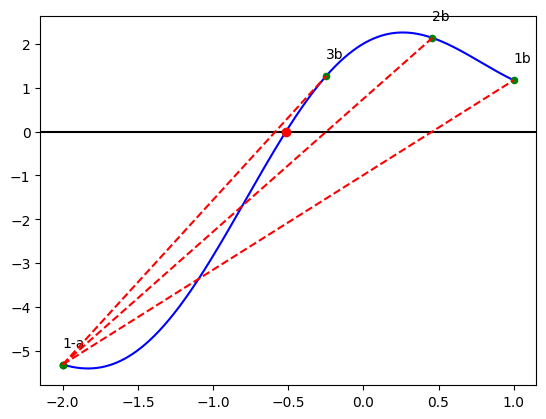

In [29]:
t = np.arange(-2, 1, 0.0001)
ans = chord_method(func5_chord, -2, 1, eps=0.001)
plt.axhline(0, color='black')
plt.plot(t, func5_chord(t), 'b', ans, func5_chord(ans), 'ro')
print(f"x: {ans:.3f}, y: {func5_chord(ans):.3f}")

# Метод Ньютона (парабол)

In [5]:
def parabolic_method(func, x1, x2, x3, eps=0.01):
    iters = []
    for i in range(1000):
        f_x1 = func(x1)
        f_x2 = func(x2)
        f_x3 = func(x3)

        x_sh = (1/2)*(x1 + x2 - ((f_x2 - f_x1) * (x3 - x2))/(x2 -x1) / ((f_x3 - f_x1)/(x3 - x1) - (f_x2 - f_x1)/(x2 - x1)))

        if i != 0:
            if np.abs(x_sh - x2) < eps:
                print(f'Iters - {i}')
                return x_sh
            
        f_x_sh = func(x_sh)

        if i < 3:
            coefs = np.polyfit([x1, x2, x3], [f_x1, f_x2, f_x3], 2)
            p = np.poly1d(coefs)
            x_parabola = np.linspace(min(x1, x3) - 0.5, max(x1, x3) + 0.5, 1000)
            plt.plot(x_parabola, p(x_parabola), '--r')
            plt.scatter([x1, x2, x3], [func(x1), func(x2), func(x3)], color='green', s=20, zorder=5)
            plt.annotate(f'{i+1}-x1', xy=(x1, func(x1)), xytext=(x1, func(x1) + 0.4))
            plt.annotate(f'{i+1}-x2', xy=(x2, func(x2)), xytext=(x2, func(x2) + 0.4))
            plt.annotate(f'{i+1}-x3', xy=(x3, func(x3)), xytext=(x3, func(x3) + 0.4))
            #plt.plot([x1, x2, x3], [func(x1), func(x2), func(x3)], 'go')

        if f_x_sh < f_x2:
            if x_sh > x2:
                x1 = x2
                x2 = x_sh
            else:
                x3 = x2
                x2 = x_sh
        else:
            if x_sh > x2:
                x3 = x_sh
            else:
                x1 = x_sh
    print(f'Iters - {i}')
    return x_sh

Iters - 5
x: -0.515, y: -0.592


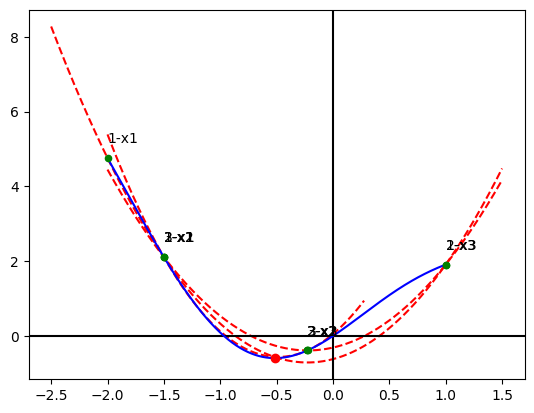

In [33]:
t = np.arange(-2, 1, 0.0001)
ans = parabolic_method(func5, -2, -1.5, 1, eps=0.001)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(t, func5(t), 'b', ans, func5(ans), 'ro')
print(f"x: {ans:.3f}, y: {func5(ans):.3f}")